<h1><center>STAT-542 HW2</center></h1>

## About HW2

For this HW, we mainly try to understand the KNN method in both classification and regression settings and use it to perform several real data examples. Tuning the model will help us understand the bias-variance trade-off. A slightly more challenging task is to code a KNN method yourself. For that question, you cannot use any additional package to assist the calculation.

## Question 1 [40 Points] KNN Classification (Diabetes)

Load the Pima Indians Diabetes Database (`PimaIndiansDiabetes`) from the `mlbench` package. If you don't already have this package installed, use the following code. It also randomly splits the data into training and testing. You should preserve this split in the analysis. 

In [104]:
# Importing Diabetes Dataset
import pandas as pd
data=pd.read_csv("diabetes.csv")

#Converting the Outcome var to categorical type
data['Outcome'] = pd.Categorical(data.Outcome)

# Setting seed 
import random
random.seed(10)

# Generating random indices for train and test split
trainid = random.sample(range(1,len(data)), len(data)//2)

# Creating train and test data
Diab_train = data.iloc[trainid]
Diab_test = data.drop(trainid)

In [105]:
Diab_train.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

a) [10 pts] Fit a KNN model using `Diab.train` and calculate both training and testing errors. For the testing error, use `Diab.test`. Plot the two errors against the corresponding $k$ values. Make sure that you differentiate them using different colors/shapes and add proper legends. Use a grid of $k$ values (every integer) from 1 to 20. 

In [106]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Creating a list of values of k: 1-20
k_grid=list(range(1,21))

# Lists for storing training and testing errors
train_errors=[]
test_errors=[]

# Fitting KNN for different values of k
for k in k_grid:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(Diab_train.iloc[: , :8],Diab_train['Outcome'])
    
    tr_p=classifier.predict(Diab_train.iloc[: , :8])
    te_p=classifier.predict(Diab_test.iloc[: , :8])
    
    train_errors.append(1-accuracy_score(Diab_train['Outcome'], tr_p))
    test_errors.append(1-accuracy_score(Diab_test['Outcome'], te_p))

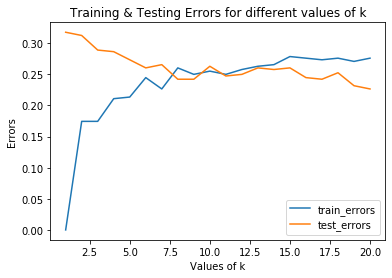

In [107]:
# Plotting Training & Testing Errors for different values of k
from matplotlib import pyplot as plt
plt.plot(k_grid, train_errors)
plt.plot(k_grid, test_errors)
plt.legend(["train_errors", "test_errors"])
plt.title('Training & Testing Errors for different values of k')
plt.xlabel('Values of k')
plt.ylabel('Errors')
plt.show()

b) [15 pts] Does the plot match (approximately) our intuition of the bias-variance trade-off in terms of having a U-shaped error? What is the optimal $k$ value based on this result? For the optimal `k`, what is the corresponding degrees-of-freedom and its error?

The plot of testing errors across different values of k seems to go down on increasing the value of k. For larger k values(greater than the current k values) we will be able to see the full shape i.e. expected U-shaped error. On increasing k, the bias increases whereas the variance decreases.

In [108]:
# Finding k corresponding to the minimum value of testing error
optimal_k= test_errors.index(min(test_errors))+1

# Error corresponding to optimal_k
error= min(test_errors)

# Degrees of freedom=n/k
degrees_of_freedom=len(Diab_test)/optimal_k

print('Optimal_k:', optimal_k)
print('Its corresponding error is: ',error,)
print('Its degrees of freedom are: ',degrees_of_freedom)

Optimal_k: 20
Its corresponding error is:  0.2265625
Its degrees of freedom are:  19.2


c) [15 pts] Suppose we do not have access to `Diab.test` data. Thus, we need to further split the training data into train and validation data to tune `k`. For this question, use the `caret` package to complete the tuning. You are required to 
    * Train the model with cross-validation using the `train()` function.
    * Specify the type of cross-validation using the `trainControl()` function. We need to use three-fold cross-validation.
    * Specify a grid of tuning parameters. This can be done using `expand.grid(k = c(1:20))`.
    * Report the best parameter with its error. Compare it with your `k` in b).

For details, read either the example from SMLR or the documentation at [here](https://topepo.github.io/caret/model-training-and-tuning.html){target='_blank'} to learn how to use the `trainControl()` and `train()` functions. Some examples can also be found at [here](https://cran.r-project.org/web/packages/caret/caret.pdf){target='_blank'}. Apply the function to the `zip.train` data with our choice of $k$ grid. 

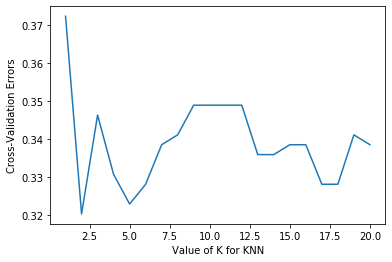

In [109]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Diab_train.iloc[: , :8], Diab_train['Outcome'], cv=3, scoring='accuracy')
    k_scores.append(1-scores.mean())
    
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Errors')
plt.show()

In [110]:
print("Optimal value of k is: ", k_scores.index(min(k_scores))+1)
print("Corresponding error is: ", min(k_scores))

Optimal value of k is:  2
Corresponding error is:  0.3203125


The optimal k obtained in b) part was k=20 however, for c) part it is k=2. 

This is because in c) part, we calculated the best k value using cross-validation on train data unlike simply taking the k value which gives minimum error on test data. Such k value may not be the best choice when performing the KNN algorithm on other unseen data. Since we obtained k from peeking into the test data(which in many cases is not available beforehand), therefore, it may not perform well on other unseen data.

## Question 2 [40 Points] Write your own KNN for regression

a) [10 pts] Generate p=5 independent standard Normal covariates X1,X2,X3,X4,X5 of n=1000 independent observations. Then, generate Y from the regression model

$$Y=X1+0.5×X2−X3+ϵ,$$

with i.i.d. standard normal error ϵ. Make sure to set a random seed 1 for reproducibility.

* Use a KNN implementation from an existing package. Report the mean squared error (MSE) for your prediction with k = 5. Use the first 500 observations as the training data and the rest as testing data. Predict the Y values using your KNN function with k = 5. Mean squared error is $$\frac{1}{N}∑_i(yi−yˆi)^2$$
This question also helps you validate your own function in b). a) and b) are expected have similar (possibly not identical) results.

* Hints: this is a regression problem instead of a classification one.

In [115]:
# Generating 5 independent standard Normal covariates
import random
import numpy as np
random.seed(1)
X = np.random.normal(0, 1, size=(1000, 5))

# Generating Y with i.i.d. standard normal error ϵ
random.seed(1)
Y = X[:,0]+0.5*X[:,1]-X[:,2]+np.random.normal(0, 1, 1000)

# Dividing into train and test data
X_train=X[:500,:]
Y_train=Y[:500]

X_test=X[500:,:]
Y_test=Y[500:]


from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
random.seed(1)
KNN_regressor = KNeighborsRegressor(n_neighbors=5)
KNN_regressor.fit(X_train, Y_train)
y_pred=KNN_regressor.predict(X_test)

mse=mean_squared_error(Y_test,y_pred)
print("Mean Squared Error for KNN with k=5 for testing data is: ", mse)

Mean Squared Error for KNN with k=5 for testing data is:  1.299357540070286


b) 30 pts] For this question, you cannot use (load) any additional R package. Write your own function myknn(xtrain, ytrain, xtest, k) that fits a KNN model and predict multiple target points xtest. The function should return a variable ytest.

* Here, xtrain is the training dataset covariate value, ytrain is the training data outcome, and k is the number of nearest neighbors. ytest is the prediction on xtest.

* Use Euclidean distance to calculate the closeness between two points.

* Test your code by reporting the mean square error on the testing data.

In [116]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(test, train):
    return np.sum(np.square(test-train))

def myknn(xtrain, ytrain, xtest, k):
    distances = [[0]*len(xtrain)]*len(xtest)
    for i in range(len(xtest)):
        for j in range(len(xtrain)):
            dist = euclidean_distance(xtest[i], xtrain[j])
            distances[i][j]=(i, dist)
            
    neighbors = [[0]*k]*len(xtest)
    for i in range(len(xtest)):
        distances[i].sort(key=lambda tup: tup[1])
        for j in range(k):
            neighbors[i][j]=(distances[i][j][0])
    
    prediction = [0]*len(xtest)
    for i in range(len(xtest)):
        output_values = [X_train[row][-1] for row in neighbors[i]]
        prediction[i]= np.mean(output_values)
    return prediction

my_y_pred=myknn(X_train, Y_train, X_test, 5)
my_mse=mean_squared_error(Y_test,my_y_pred)
print("Mean Squared Error for myknn() with k=5 on testing data is: ", my_mse)

Mean Squared Error for myknn() with k=5 on testing data is:  5.57684291746263


## Question 3 [30 Points] Curse of Dimensionality

Let’s consider a high-dimensional setting. Keep the data-generating model the same as question 3. In addition to the outcomes and covariates from question 3, we will also generate 95 more noisy variables to make p = 100. In this question, you can use a KNN function from any existing package.

We consider two different settings to generate that additional set of 95 covariates. Make sure to set random seeds for reproducibility.

* Generate another 95-dimensional covariates with all independent standard Gaussian entries.

* Generate another 95-dimensional covariates using the formula XTA, where X is the original 5-dimensional vector, and A is a 5×95 dimensional (fixed) matrix that remains the same for all observations. You should generate A just once using i.i.d. uniform [0,1] entries and then apply A to your current 5-dimensional data.

Fit KNN in both settings (with the total of 100 covariates) and select the best k value. Answer the following questions

a) [10 pts] For the first setting, what is the best k and the best mean squared error for prediction?

In [126]:
#### Setting-1 #####

# Generating additional 95 covariates
random.seed(1)
X_95_1 = np.random.normal(0,1,size=(1000,95))

# Combining with original 5 covariates
X_1=np.concatenate((X,X_95_1),axis=1)

X_1_train=X_1[:500,:]
X_1_test=X_1[500:,:]

In [161]:
from sklearn.metrics import mean_squared_error 
# Lists for storing training and testing errors
train_errors_s1=[]
test_errors_s1=[]

# Fitting KNN for different values of k
for k in k_grid:
    regressor_s1 = KNeighborsRegressor(n_neighbors=k)
    regressor_s1.fit(X_1_train,Y_train)
    
    tr_p=regressor_s1.predict(X_1_train)
    te_p=regressor_s1.predict(X_1_test)
    
    train_errors_s1.append(mean_squared_error(Y_train, tr_p))
    test_errors_s1.append(mean_squared_error(Y_test, te_p))
    
# Finding k corresponding to the minimum value of testing error
optimal_k_s1= test_errors_s1.index(min(test_errors_s1))+1

# Error corresponding to optimal_k
error_s1= min(test_errors_s1)

# Degrees of freedom=n/k
degrees_of_freedom_s1=len(X_1_test)/optimal_k_s1

print('Optimal_k:', optimal_k_s1)
print('Its corresponding MSE is: ',error_s1)
print('Its degrees of freedom are: ',degrees_of_freedom_s1)    

Optimal_k: 20
Its corresponding MSE is:  2.616764592506863
Its degrees of freedom are:  25.0


b) [10 pts] For the second setting, what is the best k and the best mean squared error for prediction?


In [145]:
#### Setting-2 #####

# Generating additional 95 covariates
random.seed(1)

# generate A just once using i.i.d. uniform [0,1] entries 
A = np.random.uniform(0,1,(5,95))

X_95_2=[]
for i in range(len(X)):
    #X_95_2[i]=np.dot(X[i][:],A)
    X_95_2.append(np.dot(X[i],A))
    
# Combining with original 5 covariates
X_2=np.concatenate((X,X_95_2),axis=1)   

X_2_train=X_2[:500,:]
X_2_test=X_2[500:,:]

In [162]:
from sklearn.metrics import mean_squared_error 
# Lists for storing training and testing errors
train_errors_s2=[]
test_errors_s2=[]

# Fitting KNN for different values of k
for k in k_grid:
    regressor_s2 = KNeighborsRegressor(n_neighbors=k)
    regressor_s2.fit(X_2_train,Y_train)
    
    tr_p=regressor_s2.predict(X_2_train)
    te_p=regressor_s2.predict(X_2_test)
    
    train_errors_s2.append(mean_squared_error(Y_train, tr_p))
    test_errors_s2.append(mean_squared_error(Y_test, te_p))
    
# Finding k corresponding to the minimum value of testing error
optimal_k_s2= test_errors_s2.index(min(test_errors_s2))+1

# Error corresponding to optimal_k
error_s2= min(test_errors_s2)

# Degrees of freedom=n/k
degrees_of_freedom_s2=len(X_2_test)/optimal_k_s2

print('Optimal_k:', optimal_k_s2)
print('Its corresponding MSE is: ',error_s2)
print('Its degrees of freedom are: ',degrees_of_freedom_s2)    

Optimal_k: 11
Its corresponding MSE is:  1.4227359106120168
Its degrees of freedom are:  45.45454545454545


c) [10 pts] In which setting kNN performs better? Why?